> ** 우리의 목표: 와인 성분 데이터를 넣으면 와인의 품질을 예측하는 모형

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 18, 9

In [2]:
red = pd.read_csv("winequality-red.csv", sep=';')
print(red.shape)
red.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
import glob
import os

In [4]:
all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [5]:
all_data = []
i = 0
for file in all_files:
    data = pd.read_csv(file, sep=';')
    data['type'] = i
    all_data.append(data)
    i +=1

wine = pd.concat(all_data, ignore_index=True)

In [6]:
wine.shape

(6497, 13)

In [7]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,1


In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [9]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [10]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [11]:
wine[wine.quality == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2373,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9,1
2419,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9,1
2426,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9,1
2475,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9,1
3204,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9,1


### 탐색적 분석
 - 레드와인인지 화이트와인인지에 따라 품질이 다를까?

In [12]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
1,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [13]:
red_quality = wine.loc[wine.type == 0, 'quality']

In [14]:
red_quality

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [15]:
white_quality = wine.loc[wine.type == 1, 'quality']

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='Density'>

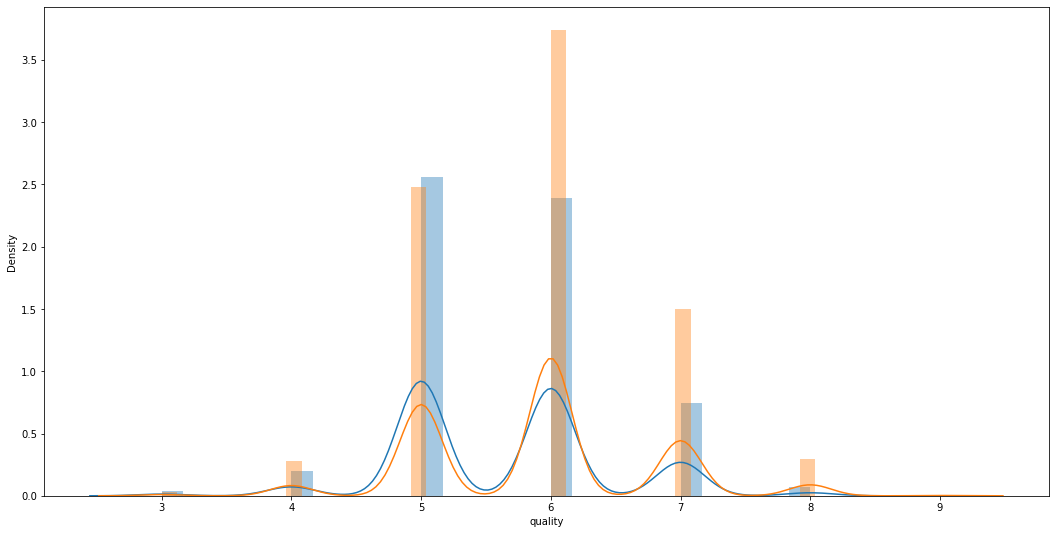

In [16]:
sns.distplot(red_quality, label='Red')
sns.distplot(white_quality, label='White')

### T검정
 - 와인 종류에 따른 품질의 차이가 통계적으로 유의한지 확인하기 위해 
 - p < 0.05

In [17]:
import statsmodels.api as sm

In [18]:
tstat, pvalue, df = sm.stats.ttest_ind(red_quality, white_quality)

In [19]:
print("T값은 %.5f, p-value는 %.8f"%(tstat, pvalue))

T값은 -9.68565, p-value는 0.00000000


### 상관관계분석

<AxesSubplot:>

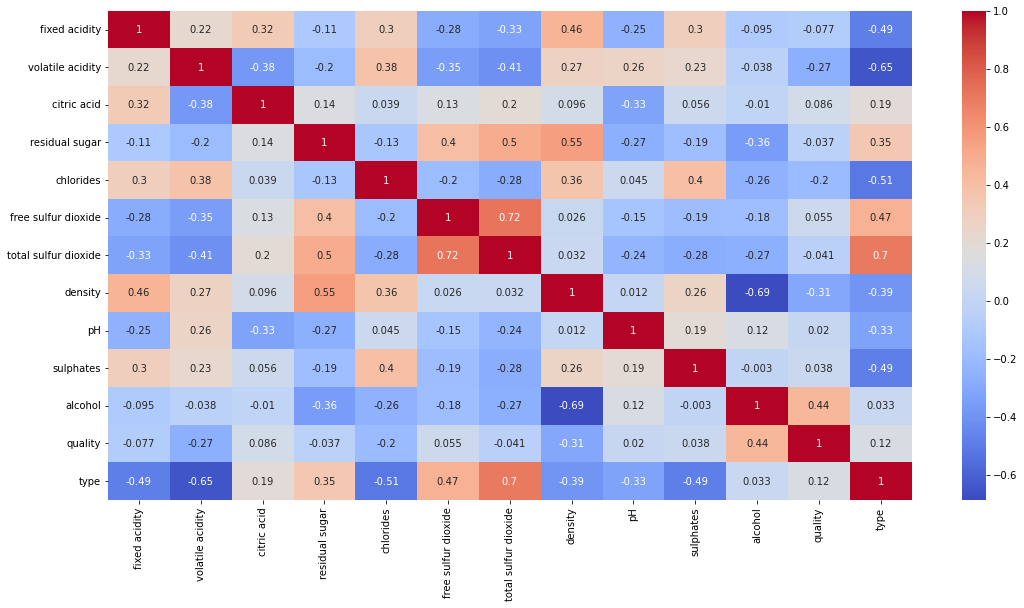

In [20]:
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')

In [21]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile acidity       -0.265699
chlorides              -0.200666
fixed acidity          -0.076743
total sulfur dioxide   -0.041385
residual sugar         -0.036980
pH                      0.019506
sulphates               0.038485
free sulfur dioxide     0.055463
citric acid             0.085532
type                    0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

### 산점도 pairplot

In [22]:
import numpy as np

In [23]:
def sampling(data, n=300):
    return data.loc[np.random.choice(data.index, size=n, replace=False)]

In [24]:
red = wine[wine.type == 0]
white = wine[wine.type ==1]

In [25]:
red_sample = sampling(red)
print(red_sample.shape)
red_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
796,8.7,0.460,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.6,5,0
1496,7.7,0.540,0.26,1.9,0.089,23.0,147.0,0.99636,3.26,0.59,9.7,5,0
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,0
1010,8.9,0.280,0.45,1.7,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7,0
1477,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.6,7,0


In [26]:
white_sample = sampling(white)
print(white_sample.shape)
white_sample.head()

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3611,6.8,0.18,0.46,1.40,0.064,37.0,160.0,0.99240,3.37,0.45,11.1,5,1
3392,7.4,0.35,0.31,17.95,0.062,42.0,187.0,1.00020,3.27,0.64,9.1,5,1
5985,6.0,0.27,0.31,5.00,0.043,54.0,170.0,0.99240,3.28,0.52,11.0,6,1
2209,6.5,0.36,0.28,3.20,0.037,29.0,119.0,0.99080,3.25,0.65,12.4,8,1
6387,6.4,0.31,0.31,12.90,0.045,55.0,161.0,0.99546,3.02,0.59,10.2,5,1


In [27]:
wine_sample = pd.concat([red_sample, white_sample])

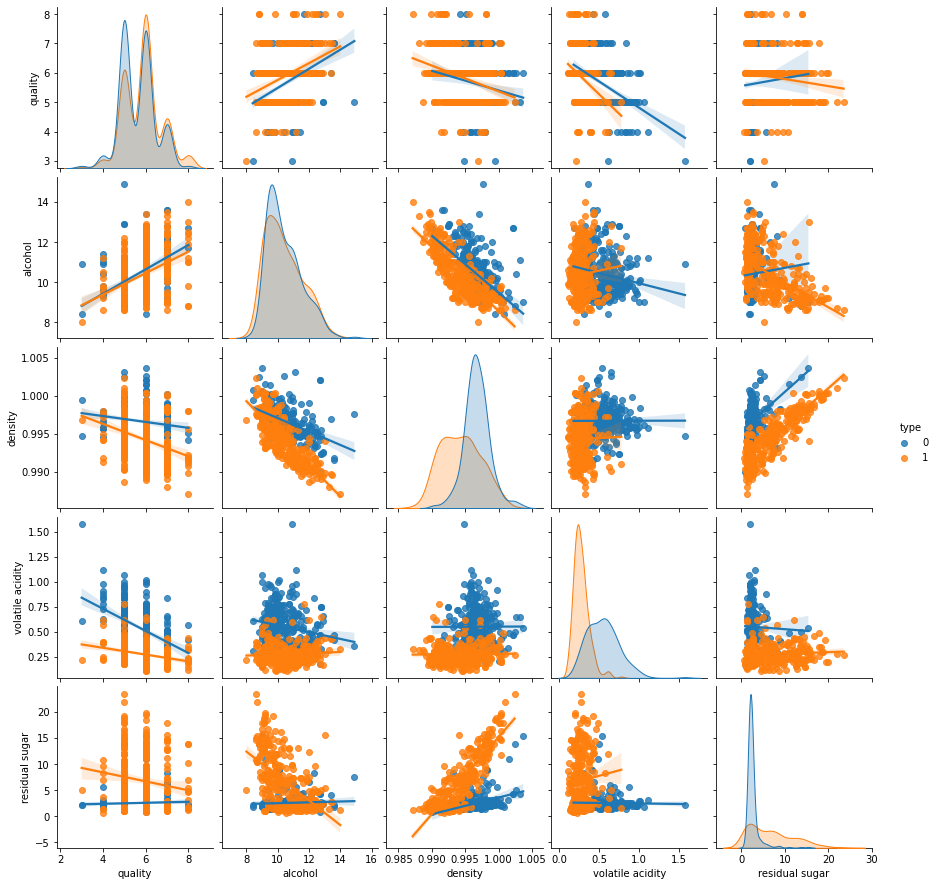

In [28]:
sns.pairplot(wine_sample, hue='type', kind='reg',
            vars=['quality', 'alcohol', 'density', 'volatile acidity', 'residual sugar'])

* 선형회귀모형

In [29]:
wine.columns = wine.columns.str.replace(' ', '_')

In [30]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [31]:
formula = 'quality ~ alcohol + density + residual_sugar + type + volatile_acidity + chlorides'

In [32]:
formula_all = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol + type'

In [33]:
from statsmodels.formula.api import ols

In [34]:
model = ols(formula, data=wine).fit()

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     418.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:21:08   Log-Likelihood:                -7274.5
No. Observations:                6497   AIC:                         1.456e+04
Df Residuals:                    6490   BIC:                         1.461e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           36.3297      8.509      4.270      0.000      19.649      53.010
alcohol              0.3114      0.013     24.164      0.000       0.286       0.337
density            -33.1933      8.446     -3.930      0.000     -49.750     -16.637
residual_sugar       0.0353      0.004      9.082      0.000       0.028       0.043
type                -0.4592      0.047     -9.847      0.000      -0.551      -0.368
volatile_acidity    -1.7047      0.074    -23.005      0.000      -1.850      -1.559
chlorides           -0.5035      0.321     -1.569      0.117      -1.133       0.126
==============================================================================
Omnibus:                      113.796   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.104
Skew:                           0.032   Prob(JB):                     1.78e-50
Kurtosis:                       3.918   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


### 독립변수의 표준화

In [37]:
y = wine.quality

In [38]:
X = wine[wine.columns.difference(['quality', 'type'])]

In [39]:
X

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.99680,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.99700,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.99800,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.99780,7.4,11.0,3.51,1.9,0.56,34.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...
6492,11.2,0.039,0.29,0.99114,6.2,24.0,3.27,1.6,0.50,92.0,0.21
6493,9.6,0.047,0.36,0.99490,6.6,57.0,3.15,8.0,0.46,168.0,0.32
6494,9.4,0.041,0.19,0.99254,6.5,30.0,2.99,1.2,0.46,111.0,0.24
6495,12.8,0.022,0.30,0.98869,5.5,20.0,3.34,1.1,0.38,110.0,0.29


In [40]:
X_standard = (X - X.mean()) / X.std()

In [41]:
wine_standard = pd.concat([X_standard, wine.quality, wine.type], axis=1)

In [42]:
model = ols(formula_all, data=wine_standard).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:21:08   Log-Likelihood:                -7195.2
No. Observations:                6497   AIC:                         1.442e+04
Df Residuals:                    6484   BIC:                         1.450e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.0908      0.044    139.245      0.000       6.005       6.177
fixed_acidity            0.1103      0.020      5.396      0.000       0.070       0.150
volatile_acidity        -0.2457      0.013    -18.345      0.000      -0.272      -0.219
citric_acid             -0.0091      0.012     -0.786      0.432      -0.032       0.014
residual_sugar           0.2971      0.028     10.522      0.000       0.242       0.352
chlorides               -0.0265      0.012     -2.264      0.024      -0.049      -0.004
free_sulfur_dioxide      0.0876      0.014      6.443      0.000       0.061       0.114
total_sulfur_dioxide    -0.0793      0.018     -4.333      0.000      -0.115      -0.043
density                 -0.3116      0.043     -7.248      0.000      -0.396      -0.227
pH                       0.0802      0.015      5.506      0.000       0.052       0.109
sulphates                0.1074      0.011      9.466      0.000       0.085       0.130
alcohol                  0.2656      0.022     12.320      0.000       0.223       0.308
type                    -0.3613      0.057     -6.367      0.000      -0.473      -0.250
==============================================================================
Omnibus:                      140.992   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              313.985
Skew:                           0.016   Prob(JB):                     6.59e-69
Kurtosis:                       4.077   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [45]:
features = ['fixed_acidity', 'volatile_acidity', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type']

In [46]:
features_B = ['volatile_acidity', 'residual_sugar', 'density', 'alcohol', 'type', 'pH']

In [47]:
X = wine_standard[features]

### 훈련 데이터셋과 테스트 데이터셋으로 나누자

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test,y_train, y_test = train_test_split(X, wine.quality, train_size=0.8,  random_state=31)

In [50]:
print(X_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 10)
(5197, 10)
(1300, 10)
(1300,)


### 머신러닝 예측모형

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
prediction = model.predict(X_test)

In [55]:
from sklearn import metrics

In [56]:
metrics.mean_absolute_error(y_test, prediction)

0.5526961889267856

In [57]:
metrics.mean_squared_error(y_test, prediction)

0.4884991903691604

### randomforest

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
# model = RandomForestClassifier(n_estimators = 5000,
#                                max_depth = 5,
#                                max_features = 0.7,
#                                random_state=0)

In [61]:
model = RandomForestRegressor(n_estimators = 500,
                               max_depth = 69,
                               max_features = 0.3,
                               random_state=0)

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)

array([-0.41563901, -0.40992888, -0.31718444, -0.37936624, -0.42321977])

In [64]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=69, max_features=0.3, n_estimators=500,
                      random_state=0)

In [65]:
prediction = model.predict(X_test)

In [66]:
prediction

array([5.972, 5.488, 6.812, ..., 5.67 , 6.434, 5.43 ])

In [67]:
metrics.mean_absolute_error(y_test, prediction)

0.424503076923077

In [68]:
metrics.mean_squared_error(y_test, prediction)

0.33278914153846156

### 모델평가

In [69]:
from sklearn import metrics

In [70]:
metrics.mean_absolute_error(y_test, prediction)

0.424503076923077

In [71]:
metrics.mean_squared_error(y_test, prediction)

0.33278914153846156

In [72]:
cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error',cv=5)

array([-0.41563901, -0.40992888, -0.31718444, -0.37936624, -0.42321977])